# **CNN IMAGE CLASSIFICATION**

Dataset: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset

In [ ]:
!pip install -q kaggle
!pip install split-folders

In [ ]:
!kaggle datasets download "muratkokludataset/rice-image-dataset"

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0
 93% 204M/219M [00:02<00:00, 125MB/s]
100% 219M/219M [00:02<00:00, 106MB/s]


In [ ]:
%%capture
!unzip rice-image-dataset.zip

**Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import keras
import os
import pandas as pd
import splitfolders

**Preprocessing**

In [ ]:
image_size = [(32, 32), (64,64), (128,128)]
batch_size = [32,64,128]
CATEGORIES = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]

In [ ]:
data_dir='Rice_Image_Dataset'
output_dir = 'output'
filepath=[]
labels=[]
folds=os.listdir(data_dir)
for fold in folds:
    file_path=os.path.join(data_dir,fold)
    if not os.path.isdir(file_path):
        continue
    fpath = os.listdir(file_path)

    for f in fpath:
        fil_path=os.path.join(file_path,f)
        filepath.append(fil_path)
        labels.append(fold)

f_series=pd.Series(filepath,name='filepaths')
l_series=pd.Series(labels,name='labels')
df=pd.concat([f_series, l_series], axis= 1)

In [ ]:
df

,filepaths,labels
0,Rice_Image_Dataset/Ipsala/Ipsala (5759).jpg,Ipsala
1,Rice_Image_Dataset/Ipsala/Ipsala (1100).jpg,Ipsala
2,Rice_Image_Dataset/Ipsala/Ipsala (12961).jpg,Ipsala
3,Rice_Image_Dataset/Ipsala/Ipsala (10577).jpg,Ipsala
4,Rice_Image_Dataset/Ipsala/Ipsala (8546).jpg,Ipsala
...,...,...
74995,Rice_Image_Dataset/Basmati/basmati (3641).jpg,Basmati
74996,Rice_Image_Dataset/Basmati/basmati (1082).jpg,Basmati
74997,Rice_Image_Dataset/Basmati/basmati (7553).jpg,Basmati
74998,Rice_Image_Dataset/Basmati/basmati (3625).jpg,Basmati


In [ ]:
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

In [ ]:
splitfolders.ratio(data_dir, output='output', seed=1234, ratio=(.7, 0.2, 0.1))

Copying files: 75000 files [00:10, 6993.09 files/s]


**Model Creation**

Batch size: 32, Image size: (32, 32)
Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8733 - loss: 0.3312
Epoch 1: val_accuracy improved from -inf to 0.96967, saving model to best_model.keras
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8733 - loss: 0.3311 - val_accuracy: 0.9697 - val_loss: 0.0867
Epoch 2/10
1636/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9690 - loss: 0.0985
Epoch 2: val_accuracy improved from 0.96967 to 0.98520, saving model to best_model.keras
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9690 - loss: 0.0985 - val_accuracy: 0.9852 - val_loss: 0.0474
Epoch 3/10
1639/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9802 - loss: 0.0621
Epoch 3: val_accuracy improved from 0.98520 to 0.99173, saving model to best_model.keras
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9802 - loss: 0.0621 - val_accuracy: 0.9917 - val_loss: 0.0270
Epoch 4/10
1637/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9848 - loss: 0.0508
Epoch 4: val_accuracy did no

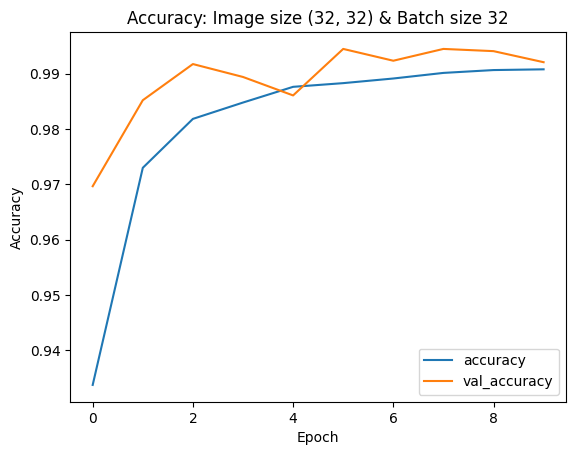

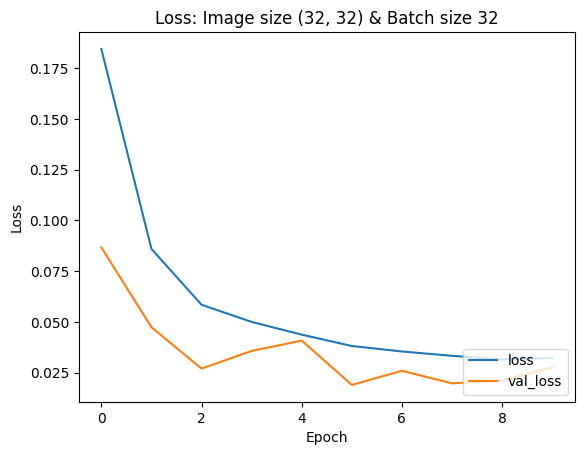

235/235 - 3s - 11ms/step - accuracy: 0.9913 - loss: 0.0271
Batch size: 32, Image size: (64, 64)
Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Epoch 1/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8973 - loss: 0.2697
Epoch 1: val_accuracy improved from -inf to 0.97733, saving model to best_model.keras
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8974 - loss: 0.2697 - val_accuracy: 0.9773 - val_loss: 0.0681
Epoch 2/10
1640/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9774 - loss: 0.0729
Epoch 2: val_accuracy did not improve from 0.97733
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9774 - loss: 0.0729 - val_accuracy: 0.9757 - val_loss: 0.0651
Epoch 3/10
1636/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9864 - loss: 0.0441
Epoch 3: val_accuracy improved from 0.97733 to 0.99460, saving model to best_model.keras
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step

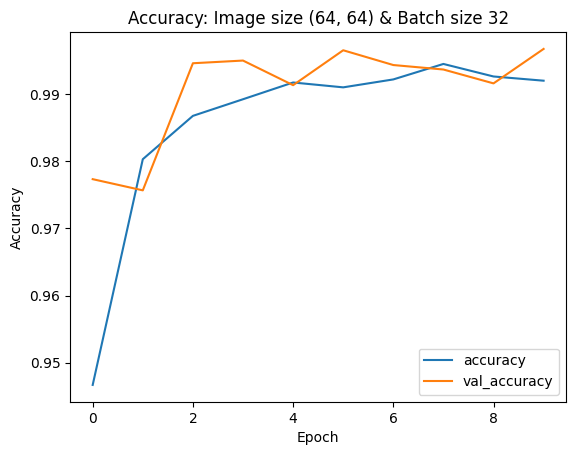

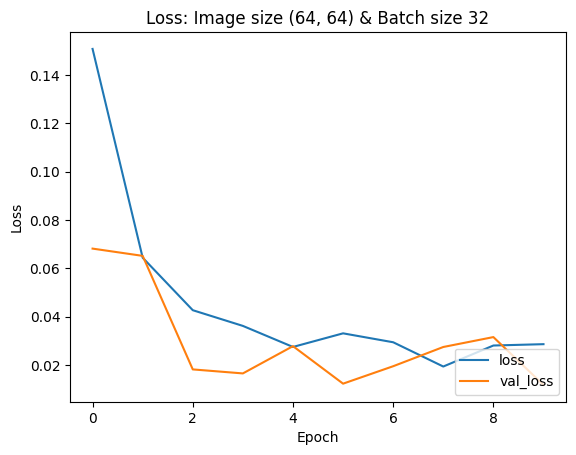

235/235 - 3s - 12ms/step - accuracy: 0.9969 - loss: 0.0103
Batch size: 32, Image size: (128, 128)
Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Epoch 1/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9036 - loss: 0.2604
Epoch 1: val_accuracy improved from -inf to 0.98820, saving model to best_model.keras
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 67s 37ms/step - accuracy: 0.9037 - loss: 0.2603 - val_accuracy: 0.9882 - val_loss: 0.0358
Epoch 2/10
1639/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9815 - loss: 0.0594
Epoch 2: val_accuracy did not improve from 0.98820
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 58s 25ms/step - accuracy: 0.9815 - loss: 0.0594 - val_accuracy: 0.9878 - val_loss: 0.0381
Epoch 3/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9857 - loss: 0.0490
Epoch 3: val_accuracy improved from 0.98820 to 0.99213, saving model to best_model.keras
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 52s 32ms/st

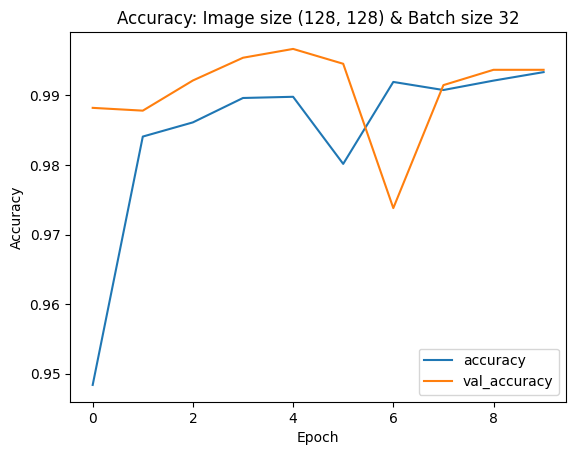

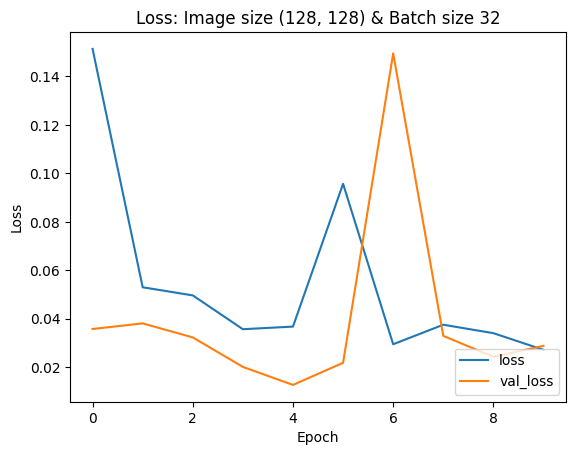

235/235 - 4s - 16ms/step - accuracy: 0.9949 - loss: 0.0207
Batch size: 64, Image size: (32, 32)
Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Epoch 1/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8555 - loss: 0.3571
Epoch 1: val_accuracy improved from -inf to 0.97793, saving model to best_model.keras
821/821 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.8556 - loss: 0.3569 - val_accuracy: 0.9779 - val_loss: 0.0692
Epoch 2/10
819/821 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9736 - loss: 0.0827
Epoch 2: val_accuracy improved from 0.97793 to 0.98000, saving model to best_model.keras
821/821 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.9736 - loss: 0.0827 - val_accuracy: 0.9800 - val_loss: 0.0604
Epoch 3/10
818/821 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9811 - loss: 0.0597
Epoch 3: val_accuracy improved from 0.98000 to 0.98507, saving model to best_model.keras
821/821 ━━━━━━━━

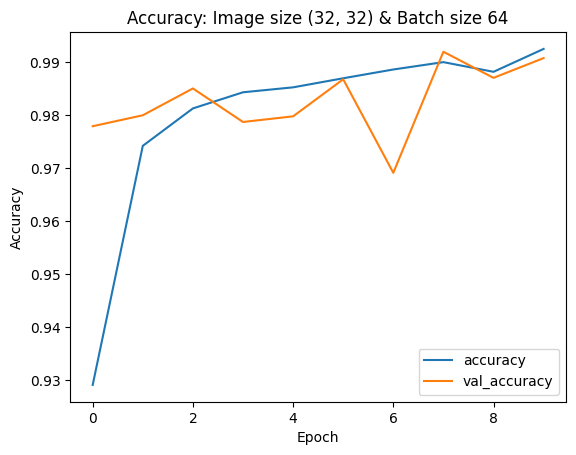

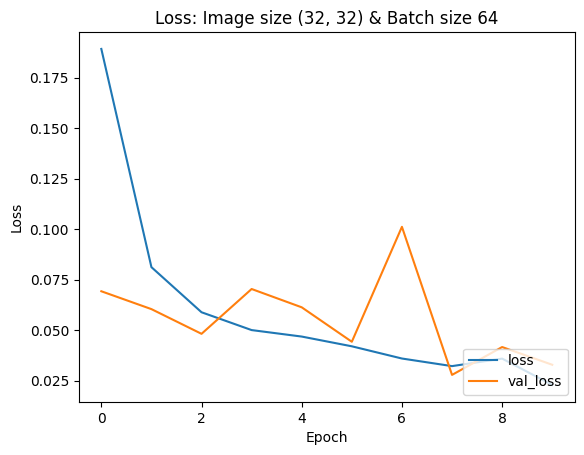

118/118 - 2s - 17ms/step - accuracy: 0.9912 - loss: 0.0278
Batch size: 64, Image size: (64, 64)
Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Epoch 1/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8791 - loss: 0.3105
Epoch 1: val_accuracy improved from -inf to 0.97280, saving model to best_model.keras
821/821 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8791 - loss: 0.3104 - val_accuracy: 0.9728 - val_loss: 0.0768
Epoch 2/10
819/821 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9685 - loss: 0.0973
Epoch 2: val_accuracy improved from 0.97280 to 0.98580, saving model to best_model.keras
821/821 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.9685 - loss: 0.0973 - val_accuracy: 0.9858 - val_loss: 0.0433
Epoch 3/10
820/821 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9806 - loss: 0.0599
Epoch 3: val_accuracy did not improve from 0.98580
821/821 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy:

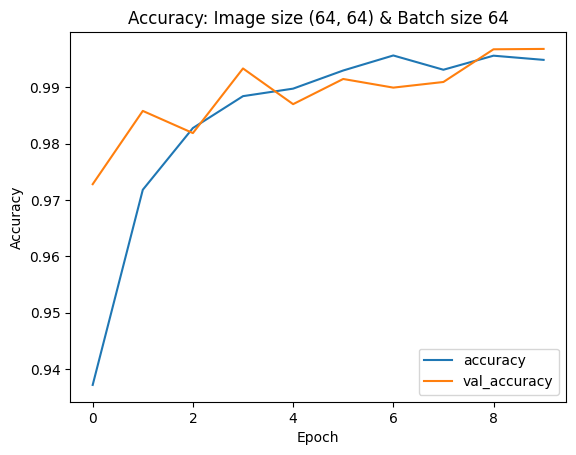

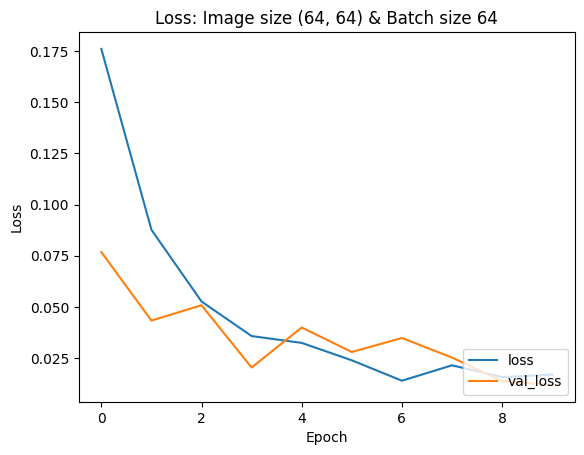

118/118 - 2s - 19ms/step - accuracy: 0.9967 - loss: 0.0102
Batch size: 64, Image size: (128, 128)
Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Epoch 1/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9002 - loss: 0.2697
Epoch 1: val_accuracy improved from -inf to 0.98507, saving model to best_model.keras
821/821 ━━━━━━━━━━━━━━━━━━━━ 58s 63ms/step - accuracy: 0.9002 - loss: 0.2696 - val_accuracy: 0.9851 - val_loss: 0.0460
Epoch 2/10
819/821 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9780 - loss: 0.0662
Epoch 2: val_accuracy improved from 0.98507 to 0.99200, saving model to best_model.keras
821/821 ━━━━━━━━━━━━━━━━━━━━ 69s 53ms/step - accuracy: 0.9780 - loss: 0.0662 - val_accuracy: 0.9920 - val_loss: 0.0258
Epoch 3/10
820/821 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9893 - loss: 0.0326
Epoch 3: val_accuracy improved from 0.99200 to 0.99327, saving model to best_model.keras
821/821 ━━━━━━

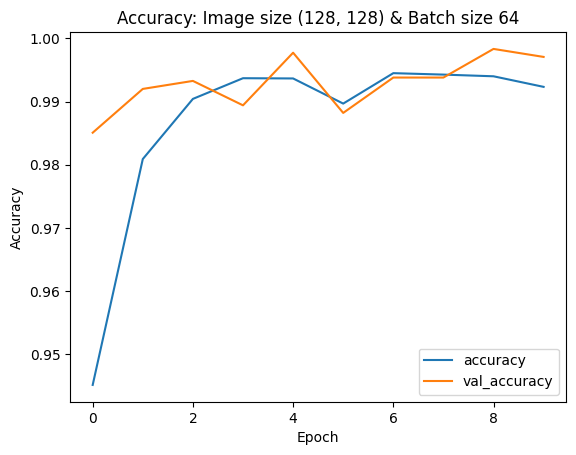

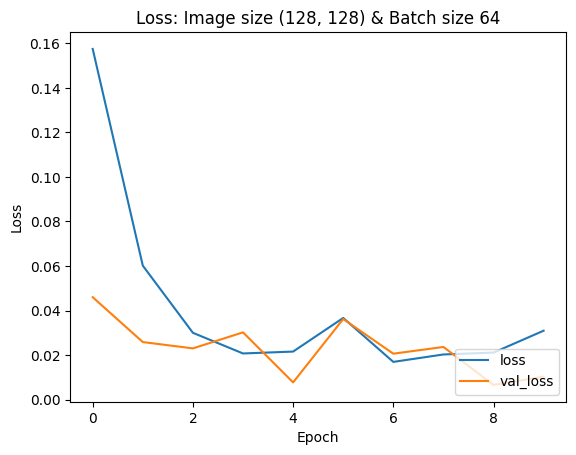

118/118 - 3s - 27ms/step - accuracy: 0.9968 - loss: 0.0100
Batch size: 128, Image size: (32, 32)
Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Epoch 1/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8253 - loss: 0.4259
Epoch 1: val_accuracy improved from -inf to 0.97260, saving model to best_model.keras
411/411 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.8255 - loss: 0.4254 - val_accuracy: 0.9726 - val_loss: 0.0779
Epoch 2/10
410/411 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9642 - loss: 0.1045
Epoch 2: val_accuracy improved from 0.97260 to 0.97567, saving model to best_model.keras
411/411 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.9642 - loss: 0.1045 - val_accuracy: 0.9757 - val_loss: 0.0661
Epoch 3/10
410/411 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9734 - loss: 0.0803
Epoch 3: val_accuracy improved from 0.97567 to 0.97693, saving model to best_model.keras
411/411 ━━━━━━━

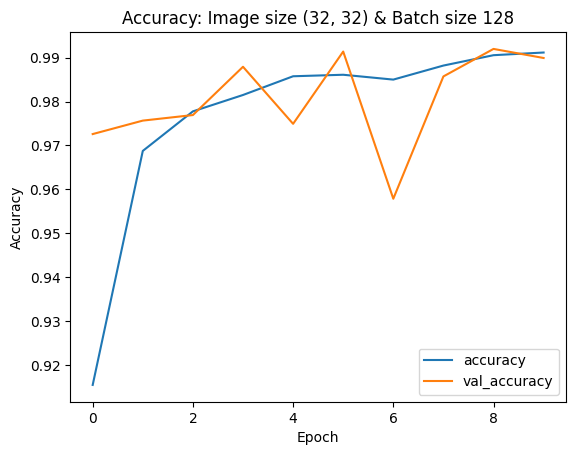

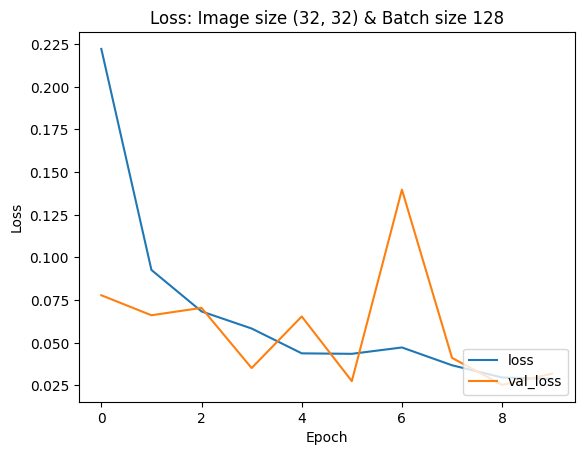

59/59 - 2s - 36ms/step - accuracy: 0.9887 - loss: 0.0288
Batch size: 128, Image size: (64, 64)
Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Epoch 1/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8680 - loss: 0.3355
Epoch 1: val_accuracy improved from -inf to 0.98487, saving model to best_model.keras
411/411 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - accuracy: 0.8682 - loss: 0.3351 - val_accuracy: 0.9849 - val_loss: 0.0437
Epoch 2/10
409/411 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9805 - loss: 0.0635
Epoch 2: val_accuracy did not improve from 0.98487
411/411 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.9805 - loss: 0.0635 - val_accuracy: 0.9589 - val_loss: 0.1254
Epoch 3/10
409/411 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9854 - loss: 0.0460
Epoch 3: val_accuracy improved from 0.98487 to 0.98513, saving model to best_model.keras
411/411 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 

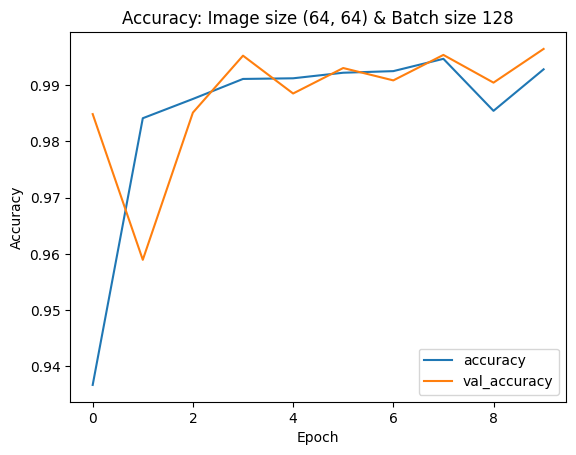

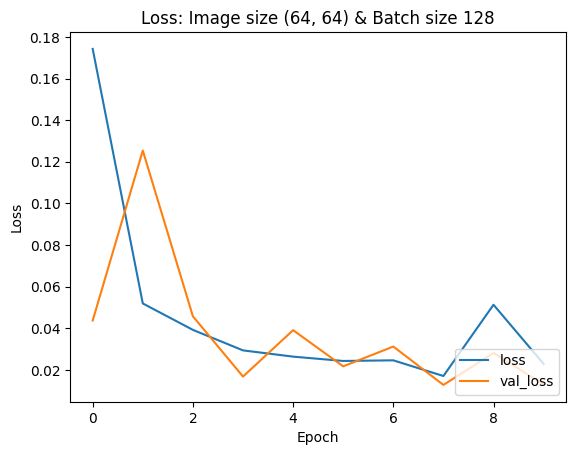

59/59 - 4s - 64ms/step - accuracy: 0.9960 - loss: 0.0126
Batch size: 128, Image size: (128, 128)
Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Epoch 1/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.8896 - loss: 0.2814
Epoch 1: val_accuracy improved from -inf to 0.99147, saving model to best_model.keras
411/411 ━━━━━━━━━━━━━━━━━━━━ 69s 144ms/step - accuracy: 0.8897 - loss: 0.2811 - val_accuracy: 0.9915 - val_loss: 0.0263
Epoch 2/10
410/411 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9846 - loss: 0.0473
Epoch 2: val_accuracy improved from 0.99147 to 0.99520, saving model to best_model.keras
411/411 ━━━━━━━━━━━━━━━━━━━━ 47s 115ms/step - accuracy: 0.9847 - loss: 0.0473 - val_accuracy: 0.9952 - val_loss: 0.0139
Epoch 3/10
410/411 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9901 - loss: 0.0293
Epoch 3: val_accuracy did not improve from 0.99520
411/411 ━━━━━━━━━━━━━━━━━━━━ 75s 98ms/step - accur

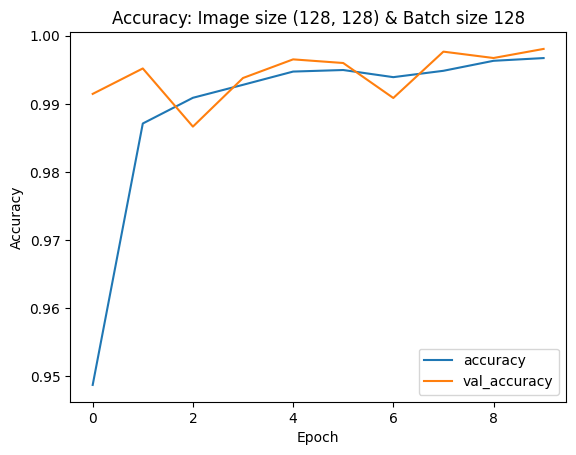

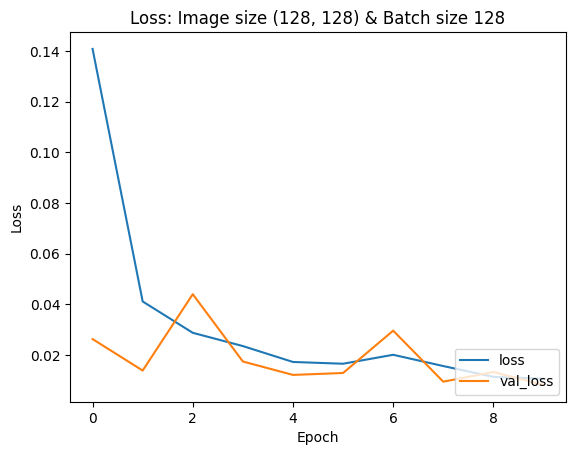

59/59 - 4s - 73ms/step - accuracy: 0.9983 - loss: 0.0074


In [ ]:
total_output = {}

for i in batch_size:
    for j in image_size:
        print(f"Batch size: {i}, Image size: {j}")

        # datasets
        train_ds = keras.utils.image_dataset_from_directory(
            "output/train",
            image_size=j,
            batch_size=i
        )
        val_ds = keras.utils.image_dataset_from_directory(
            "output/val",
            image_size=j,
            batch_size=i
        )

        test_ds = keras.utils.image_dataset_from_directory(
            "output/test",
            image_size=j,
            batch_size=i
        )

        val = j[0]

        # Model definition
        model = models.Sequential()
        model.add(layers.Rescaling(1./255, input_shape=(val, val, 3)))
        model.add(layers.Conv2D(32, (3, 3), padding="same"))
        model.add(layers.LeakyReLU(alpha=0.15))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(64, (3, 3), padding="same"))
        model.add(layers.LeakyReLU(alpha=0.15))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Conv2D(128, (3, 3), padding="same"))
        model.add(layers.LeakyReLU(alpha=0.15))
        model.add(layers.MaxPooling2D((2, 2)))

        model.add(layers.Flatten())
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.LeakyReLU(alpha=0.15))
        model.add(layers.Dropout(0.4))

        model.add(layers.Dense(256, activation='relu'))
        model.add(layers.LeakyReLU(alpha=0.15))
        model.add(layers.Dropout(0.4))

        model.add(layers.Dense(5))

        model.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

        checkpoint_cb = ModelCheckpoint(
            filepath='best_model.keras',
            save_best_only=True,
            monitor='val_accuracy',
            mode='max',
            verbose=1
        )

        history = model.fit(
            train_ds,
            epochs=10,
            validation_data=val_ds,
            callbacks=[checkpoint_cb]
        )


        #Results visualization
        plt.plot(history.history['accuracy'], label='accuracy')
        plt.plot(history.history['val_accuracy'], label='val_accuracy')
        plt.title(f"Accuracy: Image size {j} & Batch size {i}")
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        plt.show()

        plt.plot(history.history["loss"], label="loss")
        plt.plot(history.history["val_loss"], label="val_loss")
        plt.title(f"Loss: Image size {j} & Batch size {i}")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend(loc='lower right')
        plt.show()

        #Test evaluation
        test_loss, test_acc = model.evaluate(test_ds, verbose=2)
        total_output[(i, j)] = {'test_acc': test_acc, 'loss': test_loss}


In [ ]:
total_output

{(32, (32, 32)): {'test_acc': 0.9913333058357239,
  'loss': 0.027115559205412865},
 (32, (64, 64)): {'test_acc': 0.9969333410263062, 'loss': 0.01026673149317503},
 (32, (128, 128)): {'test_acc': 0.9949333071708679,
  'loss': 0.020652543753385544},
 (64, (32, 32)): {'test_acc': 0.9911999702453613,
  'loss': 0.027751626446843147},
 (64, (64, 64)): {'test_acc': 0.996666669845581, 'loss': 0.010196821764111519},
 (64, (128, 128)): {'test_acc': 0.9968000054359436,
  'loss': 0.010008134879171848},
 (128, (32, 32)): {'test_acc': 0.9886666536331177,
  'loss': 0.028848199173808098},
 (128, (64, 64)): {'test_acc': 0.9959999918937683,
  'loss': 0.012635829858481884},
 (128, (128, 128)): {'test_acc': 0.9982666373252869,
  'loss': 0.0074460324831306934}}

**Model Evaluation on Test Set**

In [ ]:
#Model with best loss and accuracy
min_loss_key = min(total_output, key=lambda x: total_output[x]['loss'])
max_acc_key = max(total_output, key=lambda x: total_output[x]['test_acc'])

print(f'Model with best loss: Batch size {min_loss_key[0]}, Image size {min_loss_key[1]}, Loss: {total_output[min_loss_key]["loss"]}')
print(f'Model with best test_acc: Batch size {max_acc_key[0]}, Image size {max_acc_key[1]}, Test Accuracy: {total_output[max_acc_key]["test_acc"]}')

Model with best loss: Batch size 128, Image size (128, 128), Loss: 0.0074460324831306934
Model with best test_acc: Batch size 128, Image size (128, 128), Test Accuracy: 0.9982666373252869
